<a href="https://colab.research.google.com/github/HassanRiaz1992/MCS-Project/blob/main/Prototype_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 8.9 MB/s 
     |████████████████████████████████| 88 kB 7.9 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████| 167 kB 67.0 MB/s 
     |████████████████████████████████| 25.8 MB 1.5 MB/s 
     |████████████████████████████████| 1.3 MB 44.1 MB/s 
     |████████████████████████████████| 6.8 MB 36.9 MB/s 
     |████████████████████████████████| 1.7 MB 48.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 662 kB 54.2 MB/s 
     |████████████████████████████████| 3.3 MB 46.1 MB/s 
     |████████████████████████████████| 141 kB 49.9 MB/s 
     |████████████████████████████████| 2.0 MB 45.6 MB/s 
     |████████████████████████████████| 3

In [ ]:
#!pip install -U imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycaret

In [ ]:
 pip install numba --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.5 MB 6.4 MB/s 
     |████████████████████████████████| 34.6 MB 219 kB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.37.0
    Uninstalling llvmlite-0.37.0:
      Successfully uninstalled llvmlite-0.37.0
  Attempting uninstall: numba
    Found existing installation: numba 0.54.1
    Uninstalling numba-0.54.1:
      Successfully uninstalled numba-0.54.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.10 requires numba<0.55, but you have numba 0.56.4 which is incompatible.


In [ ]:
from pycaret.classification import *

In [ ]:
from pycaret.datasets import get_data
data_frame = get_data('PS_20174392719_1491204439457_log')

,step,Type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data = data_frame.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = data_frame.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (208777, 11)
Unseen Data For Predictions: (10988, 11)


In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219765 entries, 0 to 219764
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            219765 non-null  int64  
 1   Type            219765 non-null  object 
 2   amount          219765 non-null  float64
 3   nameOrig        219765 non-null  object 
 4   oldbalanceOrg   219765 non-null  float64
 5   newbalanceOrig  219764 non-null  float64
 6   nameDest        219764 non-null  object 
 7   oldbalanceDest  219764 non-null  float64
 8   newbalanceDest  219764 non-null  float64
 9   isFraud         219764 non-null  float64
 10  isFlaggedFraud  219764 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 18.4+ MB


In [ ]:
data_frame.isnull().sum()

step              0
Type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
data_frame['isFraud'].fillna(data_frame['isFraud'].mode()[0], inplace=True)
#Finding the mean of the column having NaN
mean_value_amount=data_frame['amount'].mean()
# mean of values in the same column
data_frame['amount'].fillna(value=mean_value_amount, inplace=True)
#Finding the mean of the column having NaN
mean_value_oldbalanceOrg=data_frame['oldbalanceOrg'].mean()
# mean of values in the same column
data_frame['oldbalanceOrg'].fillna(value=mean_value_oldbalanceOrg, inplace=True)
#Finding the mean of the column having NaN
mean_value_newbalanceOrg=data_frame['newbalanceOrig'].mean()
# mean of values in the same column
data_frame['newbalanceOrig'].fillna(value=mean_value_newbalanceOrg, inplace=True)

In [ ]:
paysim = data_frame.drop(['step', 'nameOrig','nameDest','oldbalanceDest','newbalanceDest','isFlaggedFraud'], axis=1)
paysim.head()
paysim.isnull().sum()

Type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
isFraud           0
dtype: int64

In [ ]:
paysim['Type'].value_counts()

PAYMENT     79861
CASH_OUT    73992
CASH_IN     45648
TRANSFER    18450
DEBIT        1814
Name: Type, dtype: int64

In [ ]:
paysim.describe()

,amount,oldbalanceOrg,newbalanceOrig,isFraud
count,2.197650e+05,2.197650e+05,2.197650e+05,219765.000000
mean,1.808084e+05,8.825071e+05,9.003847e+05,0.000705
std,3.254299e+05,2.794303e+06,2.831582e+06,0.026548
min,3.000000e-01,0.000000e+00,0.000000e+00,0.000000
25%,1.229706e+04,0.000000e+00,0.000000e+00,0.000000
50%,7.083043e+04,1.952100e+04,0.000000e+00,0.000000
75%,2.306170e+05,1.932596e+05,2.294473e+05,0.000000
max,1.000000e+07,3.893942e+07,3.894623e+07,1.000000


In [ ]:
paysim.corr()

,amount,oldbalanceOrg,newbalanceOrig,isFraud
amount,1.000000,-0.019907,-0.024200,0.045349
oldbalanceOrg,-0.019907,1.000000,0.998939,-0.001483
newbalanceOrig,-0.024200,0.998939,1.000000,-0.008244
isFraud,0.045349,-0.001483,-0.008244,1.000000


In [ ]:
X = paysim.drop(['isFraud'], axis=1)
y = paysim['isFraud']
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=123)
X_resampled, y_resampled = ros.fit_resample(X, y)

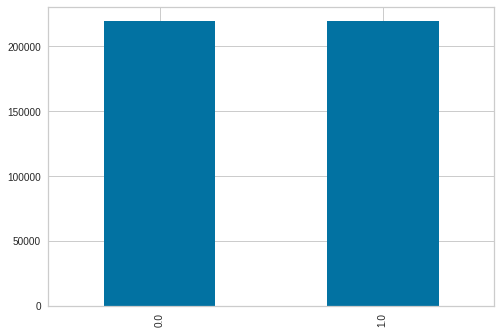

In [ ]:
y_resampled.value_counts().plot(kind='bar')

In [ ]:
ros_paysim = X_resampled
ros_paysim['isFraud'] = y_resampled

In [ ]:
clf = setup(data=ros_paysim, target = 'isFraud', session_id=123,fix_imbalance = True, normalize = True,imputation_type='iterative'	,feature_selection= True,remove_multicollinearity = True ,silent =  True)

,Description,Value
0,session_id,123
1,Target,isFraud
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(439220, 5)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='isFraud',
                                      time_features=[])),
                ('imputer',
                 Iterative_Imputer(add_indicator=False,
                                   classifier=LGBMClassifier(boosting_type='gbdt',
                                                             class_weight=None,
                                                             colsample_bytr...
                 Advanced_Feature_Selection_Classic(ml_usecase='classification',
                                

Nn@a<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

In [ ]:
#cat_feature = ['isFraud']

In [ ]:
#clf = setup(data= paysim, target = 'isFraud', session_id=123,fix_imbalance = True, normalize = True,imputation_type='iterative'	,feature_selection= True,remove_multicollinearity = True ,silent =  True)

In [ ]:
best= compare_models(include = ['lr', 'dt', 'lightgbm','lda','nb','ada'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9998,0.9998,1.000,0.9996,0.9998,0.9996,0.9996,14.141
lightgbm,Light Gradient Boosting Machine,0.9969,0.9999,1.000,0.9938,0.9969,0.9938,0.9938,16.753
ada,Ada Boost Classifier,0.9312,0.9842,0.943,0.9213,0.9320,0.8625,0.8627,19.929
lr,Logistic Regression,0.8876,0.9671,0.943,0.8489,0.8935,0.7752,0.7800,16.451
lda,Linear Discriminant Analysis,0.8384,0.9520,0.968,0.7687,0.8569,0.6769,0.7009,13.106
nb,Naive Bayes,0.7911,0.8949,1.000,0.7052,0.8271,0.5822,0.6408,12.470


INFO:logs:create_model_container: 6
INFO:logs:master_model_container: 6
INFO:logs:display_container: 2
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
#best= compare_models(include = ['rf','lr', 'dt', 'lightgbm','lda','nb','ada'])

In [ ]:
#best = compare_models()

Creat Model

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9998,0.9998,1.0,0.9996,0.9998,0.9996,0.9996
1,0.9998,0.9998,1.0,0.9995,0.9998,0.9995,0.9995
2,0.9999,0.9999,1.0,0.9998,0.9999,0.9998,0.9998
3,0.9998,0.9998,1.0,0.9995,0.9998,0.9995,0.9995
4,0.9998,0.9998,1.0,0.9995,0.9998,0.9995,0.9995
5,0.9997,0.9997,1.0,0.9994,0.9997,0.9994,0.9994
6,0.9998,0.9998,1.0,0.9997,0.9998,0.9997,0.9997
7,0.9999,0.9999,1.0,0.9997,0.9999,0.9997,0.9997
8,0.9998,0.9998,1.0,0.9997,0.9998,0.9997,0.9997


INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9991,0.9998,1.0,0.9982,0.9991,0.9982,0.9982
1,0.9992,0.9998,1.0,0.9984,0.9992,0.9984,0.9984
2,0.9996,0.9999,1.0,0.9992,0.9996,0.9992,0.9992
3,0.9988,0.9997,1.0,0.9977,0.9988,0.9977,0.9977
4,0.9995,0.9998,1.0,0.9990,0.9995,0.9990,0.9990
5,0.9993,0.9996,1.0,0.9985,0.9993,0.9985,0.9985
6,0.9998,0.9998,1.0,0.9995,0.9998,0.9995,0.9995
7,0.9995,1.0000,1.0,0.9990,0.9995,0.9990,0.9990
8,0.9992,0.9997,1.0,0.9984,0.9992,0.9984,0.9984


INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_dt= tune_model(dt, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9991,0.9998,1.0,0.9982,0.9991,0.9982,0.9982
1,0.9992,0.9998,1.0,0.9984,0.9992,0.9984,0.9984
2,0.9996,0.9999,1.0,0.9992,0.9996,0.9992,0.9992
3,0.9988,0.9997,1.0,0.9977,0.9988,0.9977,0.9977
4,0.9995,0.9998,1.0,0.9990,0.9995,0.9990,0.9990
5,0.9993,0.9996,1.0,0.9985,0.9993,0.9985,0.9985
6,0.9998,0.9998,1.0,0.9995,0.9998,0.9995,0.9995
7,0.9995,1.0000,1.0,0.9990,0.9995,0.9990,0.9990
8,0.9992,0.9997,1.0,0.9984,0.9992,0.9984,0.9984


INFO:logs:create_model_container: 10
INFO:logs:master_model_container: 10
INFO:logs:display_container: 5
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


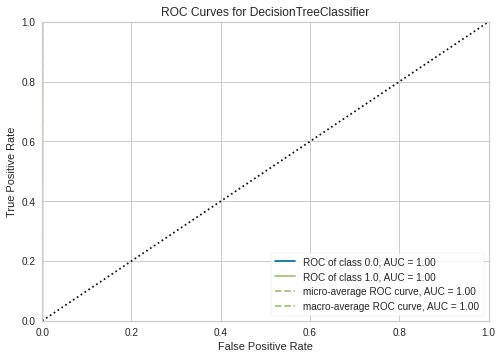

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plot model
plot_model(dt, plot = 'auc')

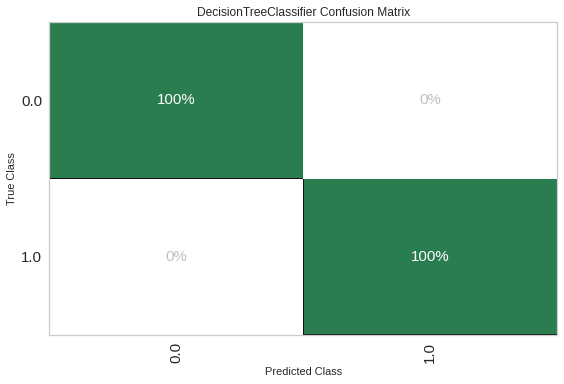

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# plot model
plot_model(dt, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [ ]:
evaluate_model(dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predictions =predict_model(dt);

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9998,0.9998,1.0,0.9997,0.9998,0.9997,0.9997


In [ ]:
unseen_predictions = predict_model(dt, data=data_unseen)
unseen_predictions.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Iterative Imputation: 1 cycle | newbalanceOrig
INFO:logs:Iterative Imputation: 1 cycle | newbalanceOrig


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0,0,0,0,0,0,0


,step,Type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Label,Score
0,13,CASH_OUT,101547.59,C1293241121,85790.49,0.0,C1020211816,219011.61,320559.20,0.0,0.0,0.0,1.0
1,13,CASH_OUT,214905.74,C7681553,0.00,0.0,C84773680,650138.68,865044.42,0.0,0.0,0.0,1.0
2,13,CASH_OUT,287316.97,C199116739,0.00,0.0,C1311088350,1873356.88,2160673.84,0.0,0.0,0.0,1.0
3,13,CASH_OUT,207073.66,C272334536,0.00,0.0,C1238799465,1797421.89,2004495.54,0.0,0.0,0.0,1.0
4,13,CASH_OUT,284189.81,C1997562797,0.00,0.0,C1646362974,482830.86,767020.66,0.0,0.0,0.0,1.0


In [ ]:
# finalize the model
final_best = finalize_model(dt)# save model to disk
save_model(final_best, 'Detection Model')

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprec

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='isFraud',
                                       time_features=[])),
                 ('imputer',
                  Iterative_Imputer(add_indicator=False,
                                    classifier=LGBMClassifier(boosting_type='gbdt',
                                                              class_weight=None,
                                                              colsample_bytr...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                      